In [1]:
from torch.utils.data import DataLoader
from dataset import MNISTDataset
from model_trainer import deep_feature_reweighting, train
from models import SimpleModel
from spurious_features import Position, spurious_square
import torch

from experiments import run_experiments

KeyboardInterrupt: 

In [3]:
spurious_features = {
    9: lambda img: spurious_square(img, pos=Position.LEFT_TOP, size=5),
    7: lambda img: spurious_square(img, pos=Position.RIGHT_BOTTOM, size=5),
}

probabilities = {9: 0.95, 7: 0.95}

opposite_spurious_features = {
    9: lambda img: spurious_square(img, pos=Position.RIGHT_BOTTOM, size=5),
    7: lambda img: spurious_square(img, pos=Position.LEFT_TOP, size=5),
}

opposite_probabilities = {9: 0.95, 7: 0.95}

config = {"batch_size": [32, 64], "latent_size": [128, 512]}

run_experiments(
    experiment_title="Experiment 1",
    labels=[7, 9],
    spurious_features=spurious_features,
    spurious_probabilities=probabilities,
    opposite_spurious_features=opposite_spurious_features,
    opposite_spurious_probabilities=opposite_probabilities,
    experiment_config=config,
)

KeyboardInterrupt: 

In [ ]:
train_dataset = MNISTDataset(
    train=True,
    labels=[9, 7],
    spurious_features={
        9: lambda img: spurious_square(img, pos=Position.LEFT_TOP, size=5),
        7: lambda img: spurious_square(img, pos=Position.RIGHT_BOTTOM, size=5),
    },
    probabilities={9: 0.95, 7: 0.95},
)

same_validation_dataset = MNISTDataset(
    train=False,
    labels=[9, 7],
    spurious_features={
        9: lambda img: spurious_square(img, pos=Position.LEFT_TOP, size=5),
        7: lambda img: spurious_square(img, pos=Position.RIGHT_BOTTOM, size=5),
    },
    probabilities={9: 0.95, 7: 0.95},
)

opposite_validation_dataset = MNISTDataset(
    train=False,
    labels=[9, 7],
    spurious_features={
        9: lambda img: spurious_square(img, pos=Position.RIGHT_BOTTOM, size=5),
        7: lambda img: spurious_square(img, pos=Position.LEFT_TOP, size=5),
    },
    probabilities={9: 0.95, 7: 0.95},
)

non_spurious_validation_dataset = MNISTDataset(
    train=False,
    labels=[9, 7],
)

# TODO
# only spurious dataset = MNISTDataset()

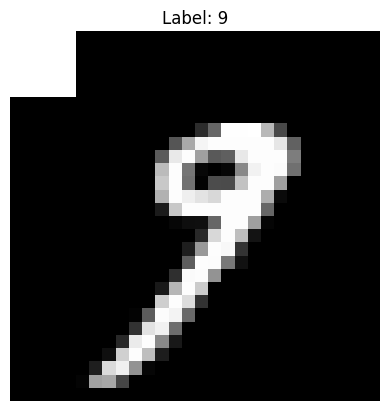

In [ ]:
train_dataset.view_item(5)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

validation_dataloaders = {
    "Unbiased": DataLoader(
        non_spurious_validation_dataset, batch_size=64, shuffle=False
    ),
    "Spurious": DataLoader(same_validation_dataset, batch_size=64, shuffle=False),
    "Opposite": DataLoader(opposite_validation_dataset, batch_size=64, shuffle=False),
}

In [ ]:
model = SimpleModel(num_classes=2)

model_path, tensorboard_path = train(
    model=model,
    validation_loaders=validation_dataloaders,
    train_loader=train_loader,
    num_epochs=15,
    optimizer_type=torch.optim.SGD,
    lr=0.001,
    weight_decay=1e-4,
    use_early_stopping=True,
    patience=2,
)

Epochs: 100%|██████████| 15/15 [01:20<00:00,  5.35s/it, Train Loss=0.0270, Valid Loss Unbiased=0.4336, Train Accuracy=99.35%, Valid Accuracy Unbiased=0.886, Valid Accuracy Spurious=0.992, Valid Accuracy Opposite=0.0442, Valid Worst Group Accuracy Unbiased=0.839, Valid Worst Group Accuracy Spurious=0.788, Valid Worst Group Accuracy Opposite=0]


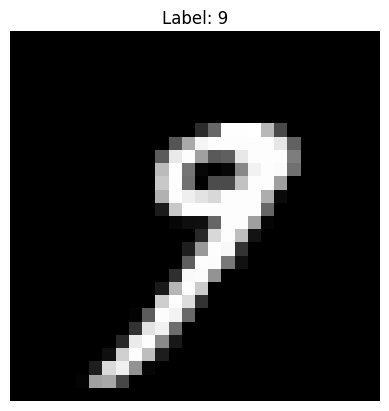

In [ ]:
dfr_train_set = MNISTDataset(train=True, labels=[9, 7])
dfr_loader = DataLoader(dfr_train_set, batch_size=64, shuffle=True)
dfr_train_set.view_item(5)

In [ ]:
model_path, tensorboard_path = deep_feature_reweighting(
    path_to_model=model_path,
    path_to_tensorboard_run=tensorboard_path,
    model=SimpleModel(num_classes=2),
    num_epochs=50,
    validation_loaders=validation_dataloaders,
    train_loader=dfr_loader,
    optimizer_type=torch.optim.SGD,
    lr=0.001,
    weight_decay=1e-4,
)

Reweighting Epochs: 100%|██████████| 50/50 [04:47<00:00,  5.76s/it, Train Loss=0.0964, Valid Loss Unbiased=0.0906, Train Accuracy=96.60%, Valid Accuracy Unbiased=0.972, Valid Accuracy Spurious=0.997, Valid Accuracy Opposite=0.377, Valid Worst Group Accuracy Unbiased=0.96, Valid Worst Group Accuracy Spurious=0.904, Valid Worst Group Accuracy Opposite=0.32]     


In [ ]:
tensorboard_path

'test'